In [1]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt

In [2]:
weight = np.array([2,4,5,3,6,5,7])
price = np.array([35, 60, 20, 50, 50, 55, 60])


In [3]:
df = pd.DataFrame({'Weight':weight, 'Price':price})
df
# df.to_csv('vegetablePrice.csv', index=True)


,Weight,Price
0,2,35
1,4,60
2,5,20
3,3,50
4,6,50
5,5,55
6,7,60


✅Task 01:
Your objective is to manually compute the slope (M) and y-intercept (C) using
Ordinary Least Squares Linear Regression. Once determined, apply these values to
predict the price when the vegetable weight is 6.50

In [4]:
# Task 01 solution:

mean_weight = np.mean(weight)
mean_weight




np.float64(4.571428571428571)

In [5]:
mean_price = np.mean(price)
mean_price


np.float64(47.142857142857146)

In [6]:
dev_weight = weight-mean_weight
dev_weight


array([-2.57142857, -0.57142857,  0.42857143, -1.57142857,  1.42857143,
        0.42857143,  2.42857143])

In [7]:
dev_price = price-mean_price
dev_price


array([-12.14285714,  12.85714286, -27.14285714,   2.85714286,
         2.85714286,   7.85714286,  12.85714286])

In [8]:
dev_weight_price = np.sum(dev_weight*dev_price)
dev_weight_price

np.float64(46.42857142857143)

In [9]:
dev_weight_square = np.sum(dev_weight**2)
dev_weight_square


np.float64(17.714285714285715)

In [10]:
# Slope
m = dev_weight_price/dev_weight_square
m


np.float64(2.620967741935484)

In [11]:
# Intercept

c = mean_price - m*mean_weight

c



np.float64(35.16129032258065)

In [12]:
# When weight = 6.5, price = ?

predict_price = m*6.5 + c
predict_price

np.float64(52.197580645161295)

✅Task 02:
Compute the residuals for each data point.

In [13]:
model = LinearRegression()
model.fit(df[['Weight']], df[['Price']])
df_copy = df.copy()

df_copy

,Weight,Price
0,2,35
1,4,60
2,5,20
3,3,50
4,6,50
5,5,55
6,7,60


In [14]:
df_copy['Predicted Price'] = model.predict(df[['Weight']])

df_copy


,Weight,Price,Predicted Price
0,2,35,40.403226
1,4,60,45.645161
2,5,20,48.266129
3,3,50,43.024194
4,6,50,50.887097
5,5,55,48.266129
6,7,60,53.508065


In [15]:
df_copy["Residuals"] = df_copy["Price"] - df_copy["Predicted Price"]

df_copy

,Weight,Price,Predicted Price,Residuals
0,2,35,40.403226,-5.403226
1,4,60,45.645161,14.354839
2,5,20,48.266129,-28.266129
3,3,50,43.024194,6.975806
4,6,50,50.887097,-0.887097
5,5,55,48.266129,6.733871
6,7,60,53.508065,6.491935


✅Task 03:
Calculate both the Mean Squared Error (MSE) and Mean Absolute Error (MAE).

In [16]:
residuals = np.array(df_copy["Residuals"])

mse = np.mean(residuals**2)
mse

np.float64(167.30990783410135)

In [17]:
residuals

mae = np.mean(abs(residuals))
mae

np.float64(9.87327188940092)

✅Final Task:
Generate an Excel file for the given dataset. Utilize Python for all the calculations.

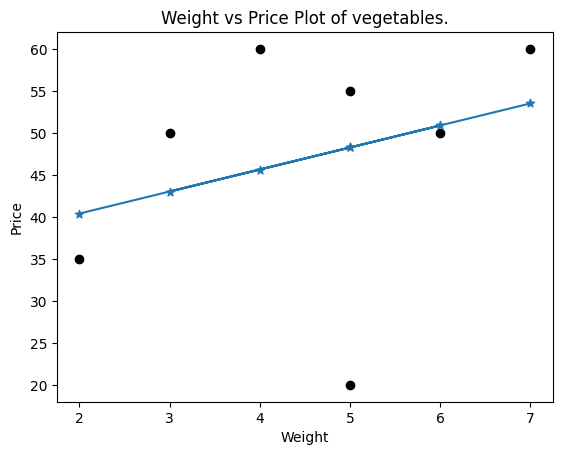

In [18]:
plt.scatter(df.Weight, df.Price, color='black')
plt.xlabel('Weight')
plt.ylabel('Price')
plt.plot(df_copy['Weight'], df_copy['Predicted Price'])
plt.scatter(df_copy['Weight'], df_copy['Predicted Price'], marker='*')
plt.title("Weight vs Price Plot of vegetables.")

plt.show()